In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

In [7]:
file="https://raw.githubusercontent.com/mohammedAljadd/students-performance-prediction/refs/heads/main/student-data.csv"
df=pd.read_csv(file)

In [8]:
df.head(8)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no


In [9]:
features=df[['freetime', 'absences', 'health']]
target=df['passed']

X=features.values
y=target.values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

In [82]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [83]:
X_train=torch.tensor(X_train, dtype=torch.float32)
X_test=torch.tensor(X_test, dtype=torch.float32)

y_train=torch.tensor(y_train, dtype = int)
y_test=torch.tensor(y_test, dtype = int)

In [84]:
class MultiClassClassifier(nn.Module):
  def __init__(self):
    super(MultiClassClassifier, self).__init__()

    self.linear1=nn.Linear(3, 4)
    self.linear2=nn.Linear(4, 6)
    self.linear3=nn.Linear(6, 2)

  def forward(self, x):
    x1 = torch.relu(self.linear1(x))
    x2 = torch.relu(self.linear2(x1))
    x3 = self.linear3(x2)
    return x3

In [85]:
model = MultiClassClassifier()
loss = nn.CrossEntropyLoss()
criteria = torch.optim.SGD(model.parameters(), lr = 0.3)
num_epochs=1000 #number of times

In [86]:
train_loss=[]
test_loss=[]

In [87]:
for ep in range(num_epochs):
  model.train()
  predicted_y = model(X_train)
  losses = loss(predicted_y, y_train)

  #feedback
  criteria.zero_grad()
  losses.backward()
  criteria.step()
  print(losses.item())

  train_loss.append(losses.item())
  model.eval()
  with torch.no_grad():
    predicted_test_y=model(X_test)
    loss_test=loss(predicted_test_y,y_test)
    test_loss.append(loss_test.item())

0.7743648886680603
0.7172306180000305
0.6858186721801758
0.6682250499725342
0.6582875847816467
0.6526685953140259
0.649238109588623
0.6471618413925171
0.6458560228347778
0.6449800133705139
0.6443362236022949
0.6438254714012146
0.6433939337730408
0.6430156826972961
0.6426742076873779
0.6423625349998474
0.6420759558677673
0.6418056488037109
0.6415544748306274
0.6413171887397766
0.6410942673683167
0.6408827900886536
0.6406826972961426
0.6404922604560852
0.6403070092201233
0.6401253342628479
0.6399494409561157
0.6397783160209656
0.6396120190620422
0.6394534111022949
0.6393022537231445
0.6391629576683044
0.6390300989151001
0.6389082670211792
0.6387947201728821
0.6386824250221252
0.6385753750801086
0.6384740471839905
0.6383810043334961
0.6383001804351807
0.6382244229316711
0.6381516456604004
0.6380817294120789
0.638014554977417
0.6379500031471252
0.6378875970840454
0.6378283500671387
0.6377714276313782
0.6377160549163818
0.6376626491546631
0.6376108527183533
0.6375608444213867
0.637513160705

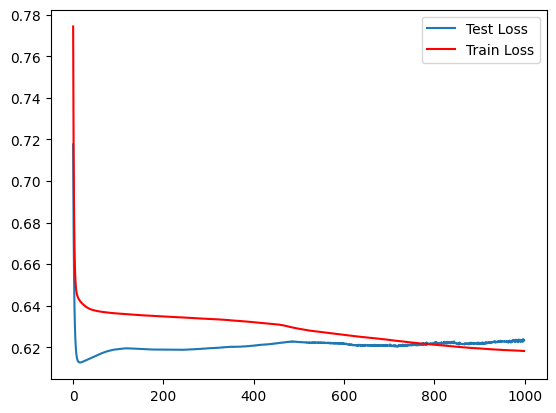

In [88]:
plt.plot(test_loss, label = 'Test Loss')
plt.plot(train_loss, color='red', label = 'Train Loss')
plt.legend()
plt.show()

In [89]:

#calculating accuracy
with torch.no_grad():
  outputs=model(X_test)
  _, predicted_classes=torch.max(outputs.data,1)  #get predicted classes

accuracy=(predicted_classes==y_test).sum().item()/y_test.size(0)
print(accuracy)

0.6962025316455697


[[ 0 24]
 [ 0 55]]


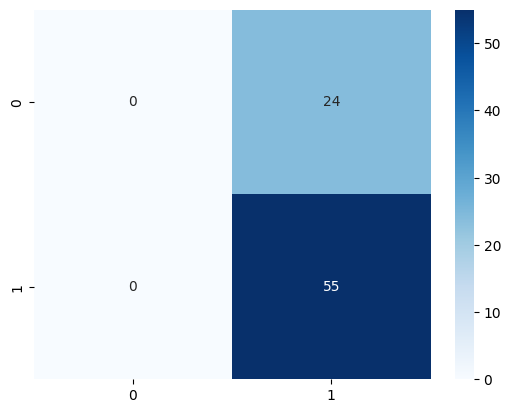

In [90]:
from sklearn.metrics import confusion_matrix

# Get predicted probabilities from the model
predicted_probs = model(X_test)

# Get predicted classes by selecting the class with the highest probability
predicted_classes = torch.argmax(predicted_probs, dim=1)

# Convert predicted_classes to numpy array to work with confusion_matrix
predicted_classes = predicted_classes.cpu().numpy()

cm = confusion_matrix(y_test, predicted_classes)
print(cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels='auto', yticklabels='auto')
plt.show()